In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


In [8]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb7', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff03.r1', 'ff14SB']  # The name of the state directories
prots = ['E4K43', 'K4E43']

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    for igb in igbs:
    #igbff_all = []
        for prot in prots:
            direc=igb + '_'+ ff + '_'+ prot
            # For each system and state, grab all the data files that match the glob
            file_glob = os.path.join(root_path, direc, filename_pattern)
            files = glob.glob(file_glob)
            for f in files:
                # Read each into a file to be put into a dict
                df = pd.read_csv(f, sep=r'\s+', skiprows=2501, names=['Frame', 'Fraction helicity'])
                df[r'Time ($\mu$s)'] = (df['Frame']-2501)/10000
                df['Helicity (%)'] = df['Fraction helicity']*100*21/19
                df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
                df['igb'] = igb
                df['ff'] = ff
                df['Peptide'] = prot
                df['igbff'] = '{0} {1}'.format(ff, igb)
                df['igbffprot'] = '{0} {1} {2}'.format(ff, igb, prot)
                igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0   2501              0.724         0.0000     80.021053              NaN   
1   2502              0.655         0.0001     72.394737              NaN   
2   2503              0.552         0.0002     61.010526              NaN   
3   2504              0.759         0.0003     83.889474              NaN   
4   2505              0.759         0.0004     83.889474              NaN   

    igb       ff Peptide         igbff           igbffprot  
0  igb1  ff03.r1   E4K43  ff03.r1 igb1  ff03.r1 igb1 E4K43  
1  igb1  ff03.r1   E4K43  ff03.r1 igb1  ff03.r1 igb1 E4K43  
2  igb1  ff03.r1   E4K43  ff03.r1 igb1  ff03.r1 igb1 E4K43  
3  igb1  ff03.r1   E4K43  ff03.r1 igb1  ff03.r1 igb1 E4K43  
4  igb1  ff03.r1   E4K43  ff03.r1 igb1  ff03.r1 igb1 E4K43  


In [19]:
89.7*29/27

96.34444444444445

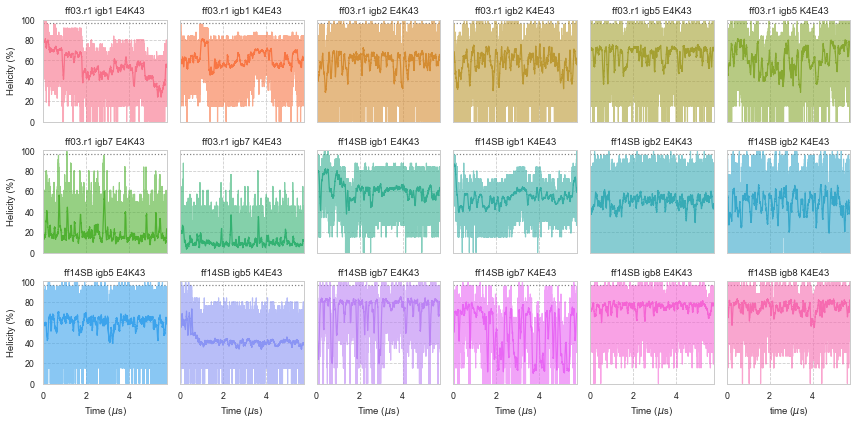

In [14]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("viridis"), font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="igbffprot", col_wrap=6, hue="igbffprot", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.34, ls=":", c=".5") # 85.7*21/19

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.6).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/helicity_1.pdf')
plt.savefig('./plots/helicity_1.png', dpi=300)
plt.show()

In [5]:
df_total.groupby('igbffprot')['Helicity (%)'].mean()

igbffprot
fb15 igb7 E4K43         84.797339
fb15 igb7 K4E43         77.777886
ff03.r1 igb1 E4K43      54.605532
ff03.r1 igb1 K4E43      61.841605
ff03.r1 igb2 E4K43      58.612383
ff03.r1 igb2 K4E43      57.738732
ff03.r1 igb5 E4K43      65.510288
ff03.r1 igb5 K4E43      60.548046
ff03.r1 igb7 E4K43      18.968460
ff03.r1 igb7 K4E43      10.544196
ff14SB igb1 E4K43       61.851228
ff14SB igb1 K4E43       55.468693
ff14SB igb2 E4K43       49.922057
ff14SB igb2 K4E43       47.579249
ff14SB igb5 E4K43       59.703162
ff14SB igb5 K4E43       42.961067
ff14SB igb7 E4K43       70.537889
ff14SB igb7 K4E43       51.561908
ff14SB igb8 E4K43       74.920606
ff14SB igb8 K4E43       74.544700
ff15ipq igb7 E4K43       7.790261
ff15ipq igb7 K4E43      20.940301
ff94 igb1 E4K43         81.742242
ff94 igb1 K4E43         85.507043
ff94 igb7 E4K43         87.407985
ff94 igb7 K4E43         85.223823
ff94 igb8 E4K43         85.073537
ff94 igb8 K4E43         83.261959
ff96 igb5 E4K43         83.702426
ff96

In [6]:
df_total.groupby(['igbff','Peptide'])['Helicity (%)'].mean()

igbff           Peptide
fb15 igb7       E4K43      84.797339
                K4E43      77.777886
ff03.r1 igb1    E4K43      54.605532
                K4E43      61.841605
ff03.r1 igb2    E4K43      58.612383
                K4E43      57.738732
ff03.r1 igb5    E4K43      65.510288
                K4E43      60.548046
ff03.r1 igb7    E4K43      18.968460
                K4E43      10.544196
ff14SB igb1     E4K43      61.851228
                K4E43      55.468693
ff14SB igb2     E4K43      49.922057
                K4E43      47.579249
ff14SB igb5     E4K43      59.703162
                K4E43      42.961067
ff14SB igb7     E4K43      70.537889
                K4E43      51.561908
ff14SB igb8     E4K43      74.920606
                K4E43      74.544700
ff15ipq igb7    E4K43       7.790261
                K4E43      20.940301
ff94 igb1       E4K43      81.742242
                K4E43      85.507043
ff94 igb7       E4K43      87.407985
                K4E43      85.223823
ff94 igb8     

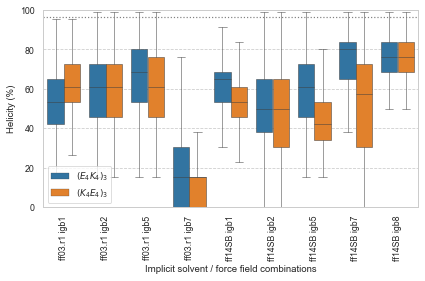

In [15]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'}, color_codes=False)

# fig, axes = plt.subplots(figsize=(12, 10))
fig, axes = plt.subplots()

ax=sns.boxplot(x='igbff', y='Helicity (%)', hue='Peptide', data=df_total, fliersize=0, linewidth=0.5)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')

handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, ["$(E_4K_4)_3$", "$(K_4E_4)_3$"], loc='lower left') # Associate manually the artists to a label.

plt.axhline(y=96.34, ls=":", c=".5" ) # 90.9*33/31
plt.tight_layout()
#plt.savefig('./helicity_boxplot.pdf', dpi=600)
#plt.legend(loc='lower left')
plt.savefig('./plots/helicity_boxplot_1.png', dpi=300)
plt.savefig('./plots/helicity_boxplot_1.pdf')

In [19]:
temp=df_total.drop(columns=['Frame', 'Fraction helicity', r'Time ($\mu$s)', 'Mouving average', 'igb','ff', 'igbff', 'Peptide' ])
temp

,Helicity (%),igbffprot
0,95.273684,ff94 igb1 E4K43
1,87.647368,ff94 igb1 E4K43
2,83.889474,ff94 igb1 E4K43
3,91.515789,ff94 igb1 E4K43
4,95.273684,ff94 igb1 E4K43
5,87.647368,ff94 igb1 E4K43
6,87.647368,ff94 igb1 E4K43
7,72.394737,ff94 igb1 E4K43
8,80.021053,ff94 igb1 E4K43
9,87.647368,ff94 igb1 E4K43


In [20]:
grouped=temp.groupby(['igbffprot'])
grouped

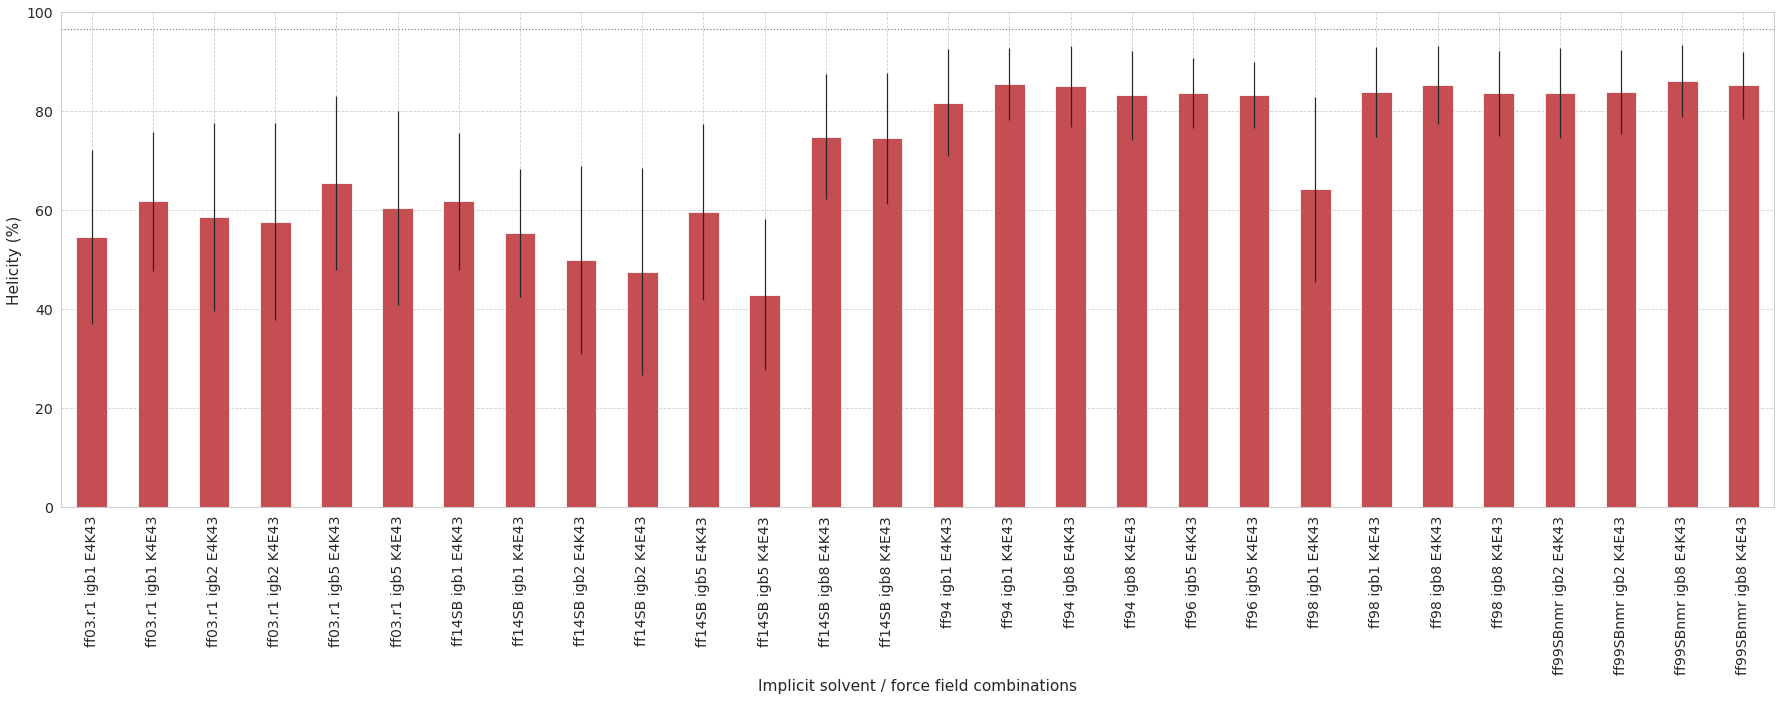

In [21]:
mean = grouped.mean()

errors = grouped.std()


ax=mean.plot(yerr=errors, kind='bar',figsize=(25,10), ylim=(0, 100), legend=False, rot=90 )
ax.set_ylabel('Helicity (%)')
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
plt.tight_layout()
plt.savefig('./helicity_avg.pdf')
plt.savefig('./helicity_avg.png')
#plt.show()

In [20]:
100*30/31

96.7741935483871

In [21]:
8*4+3

35

In [22]:
100*34/35

97.14285714285714